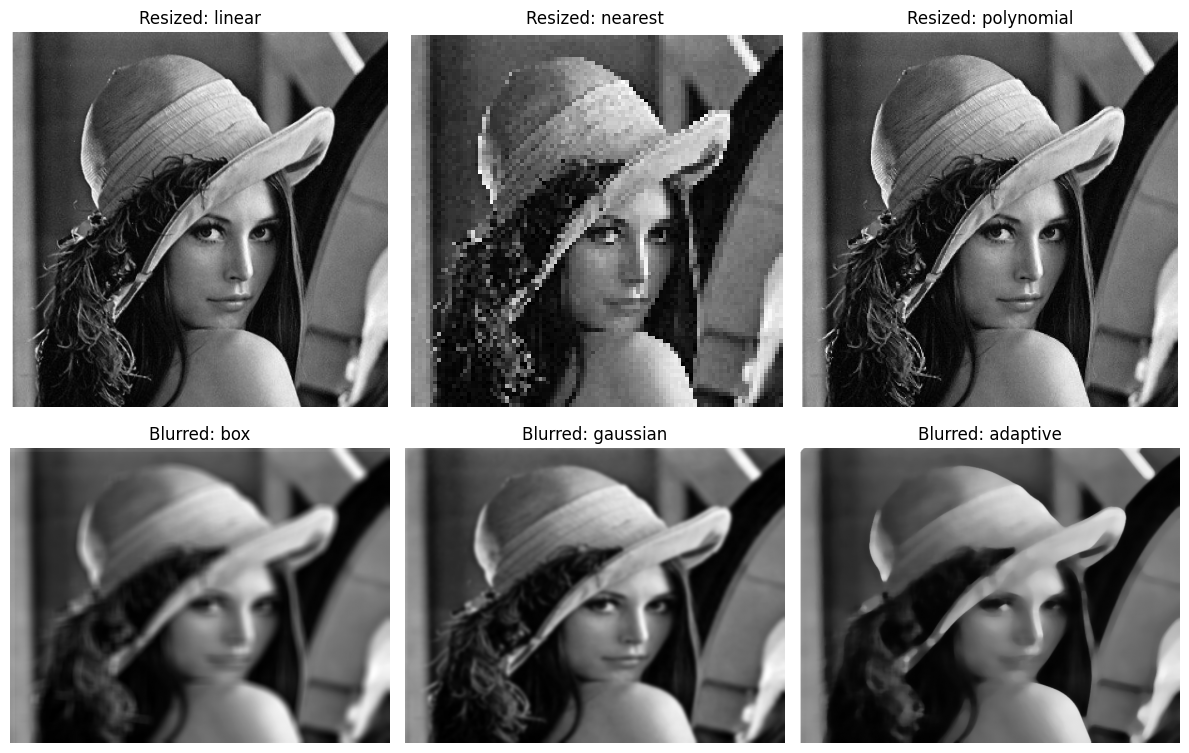

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def resize_image(image, method):
    if method == 'linear':
        return cv2.resize(image, (400, 400), interpolation=cv2.INTER_LINEAR)  # Upscale
    elif method == 'nearest':
        return cv2.resize(image, (100, 100), interpolation=cv2.INTER_NEAREST)  # Downscale
    elif method == 'polynomial':
        return cv2.resize(image, (300, 300), interpolation=cv2.INTER_CUBIC)  # Upscale
    else:
        raise ValueError("Unknown interpolation method")

def blur_image(image, method):
    if method == 'box':
        return cv2.blur(image, (15, 15))  # Larger box kernel
    elif method == 'gaussian':
        return cv2.GaussianBlur(image, (15, 15), 0)  # Larger Gaussian kernel
    elif method == 'adaptive':
        return cv2.medianBlur(image, 15)  # Larger adaptive kernel
    else:
        raise ValueError("Unknown blurring method")

def main():

    image = cv2.imread('/content/image-1.png', cv2.IMREAD_GRAYSCALE)


    methods = ['linear', 'nearest', 'polynomial']
    blur_methods = ['box', 'gaussian', 'adaptive']

    plt.figure(figsize=(12, 8))

    # Resizing
    for i, method in enumerate(methods):
        resized = resize_image(image, method)
        plt.subplot(2, 3, i+1)
        plt.imshow(resized, cmap='gray')
        plt.title(f'Resized: {method}')
        plt.axis('off')

    # Blurring
    for i, method in enumerate(blur_methods):
        blurred = blur_image(image, method)
        plt.subplot(2, 3, i+4)
        plt.imshow(blurred, cmap='gray')
        plt.title(f'Blurred: {method}')
        plt.axis('off')

    # Display results
    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    main()

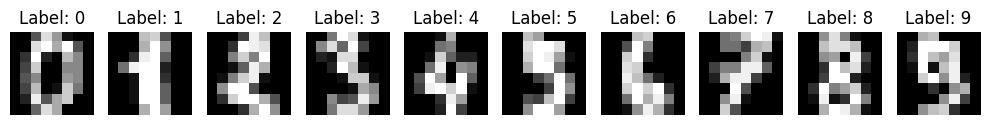

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()
X, y = digits.data, digits.target

# Display first 10 digits
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f'Label: {y[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
nb_model = GaussianNB()
rf_model = RandomForestClassifier()

nb_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Metrics
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        33
           1       0.83      0.86      0.84        28
           2       0.91      0.61      0.73        33
           3       0.91      0.85      0.88        34
           4       0.97      0.83      0.89        46
           5       0.90      0.94      0.92        47
           6       0.92      0.97      0.94        35
           7       0.69      0.97      0.80        34
           8       0.57      0.87      0.68        30
           9       0.96      0.65      0.78        40

    accuracy                           0.85       360
   macro avg       0.86      0.85      0.84       360
weighted avg       0.88      0.85      0.85       360

Confusion Matrix:
 [[31  0  0  0  0  1  0  1  0  0]
 [ 0 24  0  0  0  0  0  0  3  1]
 [ 0  2 20  0  0  0  1  0 10  0]
 [ 0  0  1 29  0  1  0  0  3  0]
 [ 0  0  0  0 38  0  1  7  0  0]
 [ 0  0  0  1  0 44  1